# ЛАБОРАТОРНАЯ РАБОТА №2
### УСТОЙЧИВОСТЬ СТАЦИОНАРНЫХ СИСТЕМ АВТОМАТИЧЕСКОГО УПРАВЛЕНИЯ

#### Аннотация.
Система автоматического управления (САУ) должна выполнять различные требования. Система должна оставаться устойчивой на всех режимах, при смене заданного значения система должна переходить в нужное состояние по возможности быстро и плавно и  должна сохранять устойчивость и приемлемое качество функционирования даже в том случае, если динамика объекта и свойства внешних возмущений немного отличаются от тех, что использовались при проектировании. 
Для того, чтобы понимать, устойчива проектируемая САУ или нет, необходимо проводить исследование САУ на устойчивость.

#### Цель:
Экспериментальное исследование условий устойчивости замкнутых САУ, оценка устойчивости по различным критериям устойчивости, определение запасов устойчивости.

#### Исходные данные: 
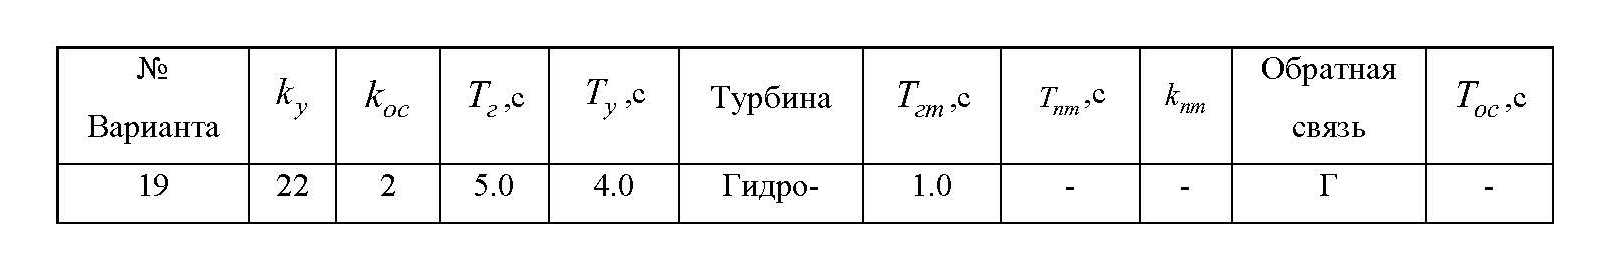

Задание:
1. Снять переходную характеристику h(t).
2. Определить значения полюсов передаточной функции замкнутой САУ, проанализировать их характер и сделать заключение об устойчивости САУ.
3. Разомкнуть САУ и оценить устойчивость по критерию Найквиста. Определить запасы устойчивости по модулю и по фазе.
4. Построить годограф Михайлова. Сделать вывод об устойчивости САУ по критерию Михайлова.
5. Снять логарифмическую амплитудную частотную и логарифмическую фазовую частотную характеристики разомкнутой системы.
6. На основании алгебраического критерия Рауса–Гурвица рассчитать предельное значение k_(ос пред), при котором САУ находится на границе устойчивости.

In [31]:
import matplotlib.pyplot as plt
import numpy, sympy
import time
import control as crt
import control.matlab
import cmath 

# Init data
ky=22
koc=2
Tg=5.0
Ty=4.0
type_gen='Hydro'
Tgm=1.0

len_t=700

t= [i for i in range(len_t)]

In [5]:
def plot_func(x,y, title):
    
    subtitle=title
    fig=plt.figure()
    fig.suptitle(subtitle, fontsize=16)
    fig.set_figheight(10)
    fig.set_figwidth(14)
    
    plt.plot(x,y, 'g', linewidth=2, markersize=12)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('t,c')    

In [6]:
def raus_gur(D):
    # No universal function
    # Ust = 0, Ust < 0.75 - неусточивая система
    # Ust = 0.75 - на границе устойчивости
    # Ust = 1 - устойчивая система
    
    a0=D[0]
    a1=D[1]
    a2=D[2]
    a3=D[3]
    
    #print("a0=",a0,"\na1=",a1,"\na2=",a2,"\na3=",a3)
    k=0
    
    Ust_=1
    
    # check all sign
    for i in range(0,len(D)):
        if D[i]>0:
            k=k+1
    if k<len(D):
        Ust_=0
    
    k=2*k*Ust_/len(D)
        
    print("k=",k)
    
    M1=a1*a2-a3*a0
    
    print("M1=",M1)
    
    if M1>0:
        l=1
    elif abs(M1)>1e-14 and abs(M1)<1e-3:
        l=0.5
    elif M1<0:
        l=0
    
    print("l=",l)
    
    M0=M1*a3
    if M0>0:
        m=1
    elif abs(M0)>1e-14 and abs(M0)<1e-3:
        m=0.5
    elif M0<0:
        m=0
    
    print("M0=",M0)
    
    print("m=",m)

    Ust=Ust_*(k+l+m)/4
    
    return Ust

In [23]:
def Mikhailov(den):

    W_mic=crt.tf(den, 1)
    #print(W_mic)

    func_re=[]
    func_im=[]

    for omega in range(0,335,1):
        omega=omega/100

        func = crt.evalfr(W_mic,1j*omega)

        # get array list of lists
        re_f=func.real
        im_f=func.imag

        #get list to lists
        re_f_l=re_f.tolist()
        im_f_l=im_f.tolist()


        # append in list
        func_re.append(re_f_l)
        func_im.append(im_f_l)
    return func_re,func_im

In [8]:
# Init transfer function coeff
num1=[koc,0]
num2=1
num3=[0.01*Tgm,1]
num4=ky

dem1=1
dem2=[Tg,1]
dem3=[0.05*Tg,1]
dem4=[Ty,1]

In [9]:
# Get transfer function for each system element
W1=crt.tf(num1, dem1)
W2=crt.tf(num2, dem2)
W3=crt.tf(num3, dem3)
W4=crt.tf(num4, dem4)
print('W1:', W1,'\nW2:', W2, '\nW3:', W3,'\nW4:', W4)

W1: 
2 s
---
 1
 
W2: 
   1
-------
5 s + 1
 
W3: 
0.01 s + 1
----------
0.25 s + 1
 
W4: 
  22
-------
4 s + 1



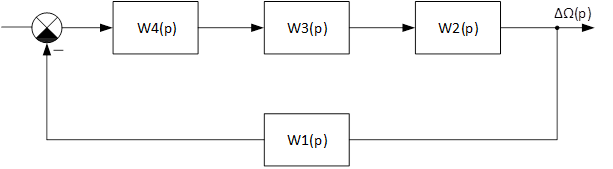

In [10]:
# Conversions
W234=crt.matlab.series(W4,W3,W2)
W=crt.matlab.feedback(W234, W1, sign=-1)
#W234=crt.series(W2,W3,W4)
#W=crt.feedback(W234, W1, sign=-1)
print(W234)
print(W)


          0.22 s + 22
------------------------------
5 s^3 + 22.25 s^2 + 9.25 s + 1


          0.22 s + 22
-------------------------------
5 s^3 + 22.69 s^2 + 53.25 s + 1



In [11]:
# Find k_oc{pred}
koc_=+3/176*(numpy.sqrt(8731641)-2979) #получено аналитически
#koc_=-0.41020
print("koc_pr=",koc_)

num1_=[koc_,0]
W1_=crt.tf(num1_, dem1)
#print(W1_)
W_=crt.matlab.feedback(W234, W1_, sign=-1)
print(W_)
den=W_.den

D=den[0][0]

Ust=raus_gur(D)
print("Ust=",Ust)

koc_pr= -0.41019844318699417

          0.22 s + 22
--------------------------------
5 s^3 + 22.16 s^2 + 0.2256 s + 1

k= 2.0
M1= -8.79296635503124e-13
l= 0.5
M0= -8.79296635503124e-13
m= 0.5
Ust= 0.75


In [49]:
#koc_n=+3/176*(numpy.sqrt(8731641)-2979) #получено аналитически
koc_n=-0.51020
print("koc_n=",koc_n)

num1_n=[koc_n,0]
W1_n=crt.tf(num1_n, dem1)
#print(W1_)
W_n=crt.matlab.feedback(W234, W1_n, sign=-1)
print(W_n)
den=W_n.den

D=den[0][0]

Ust=raus_gur(D)
print("Ust=",Ust)

koc_n= -0.5102

          0.22 s + 22
-------------------------------
5 s^3 + 22.14 s^2 - 1.974 s + 1

k= 0.0
M1= -48.708785446399986
l= 0
M0= -48.708785446399986
m= 0
Ust= 0.0


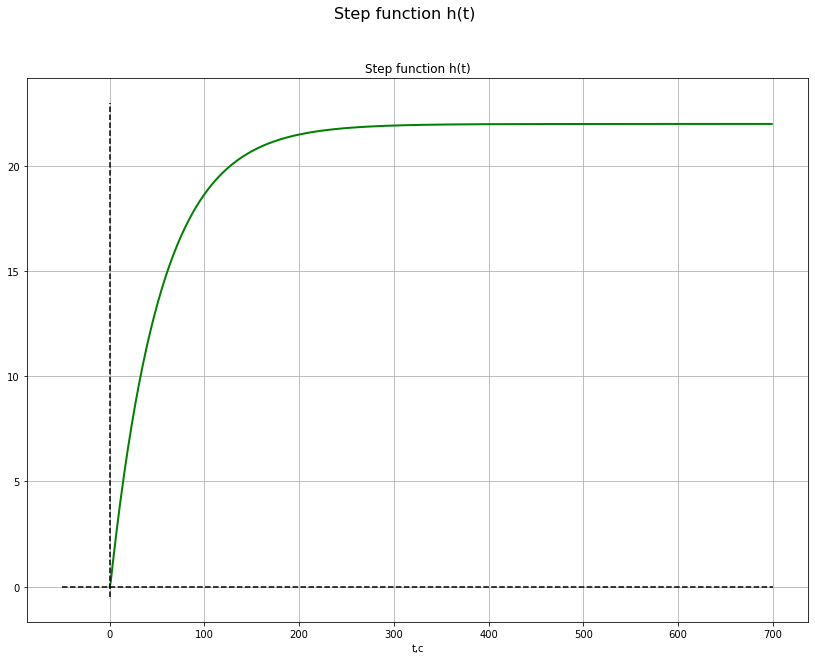

In [50]:
# Step function
h,t_=crt.matlab.step(W,t,0)
plot_func(t_,h, 'Step function h(t)')
plt.plot([0,0],[-0.5, 23],"k--")
plt.plot([-50,len_t],[0, 0],"k--")
#plt.plot([-50,len_t+1],[22, 22],"b--")

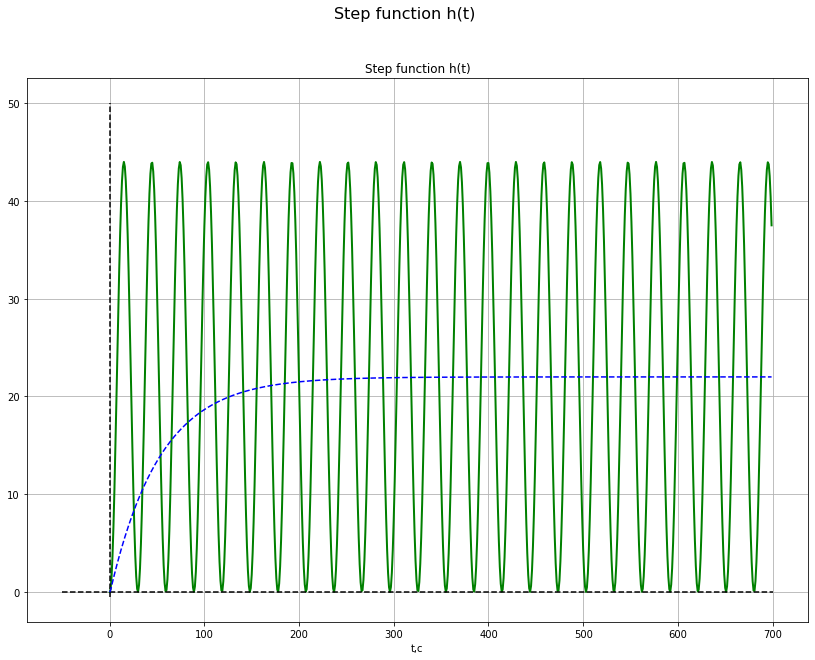

In [51]:
h_,t__=crt.matlab.step(W_,t,0)
h_n,t__n=crt.matlab.step(W_n,t,0)
plot_func(t__,h_, 'Step function h(t)')
plt.plot([0,0],[-0.5, 50],"k--")
plt.plot([-50,len_t],[0, 0],"k--")
#plt.plot([-50,len_t],[22, 22],"r--")
plt.plot(t_,h,"b--")

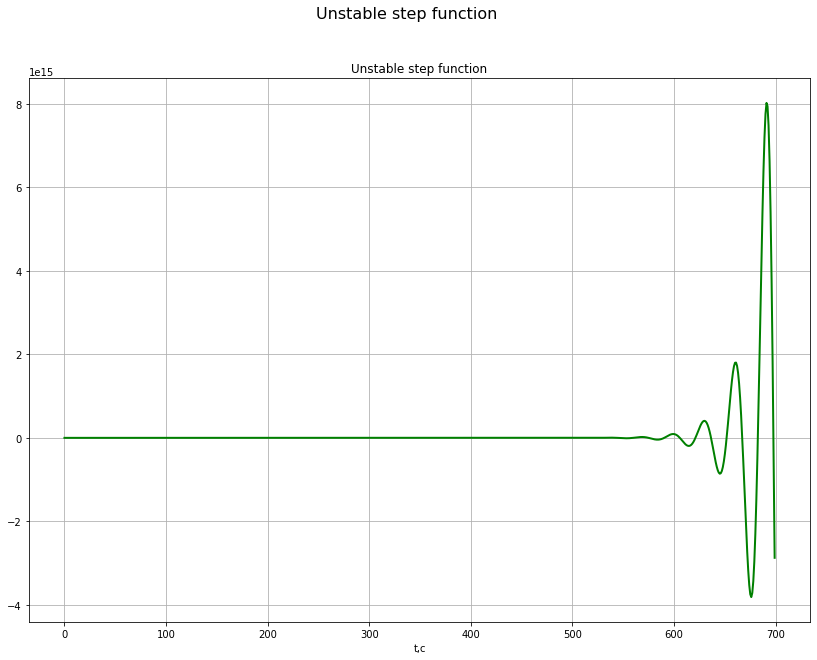

In [52]:
plot_func(t__n,h_n,"Unstable step function")

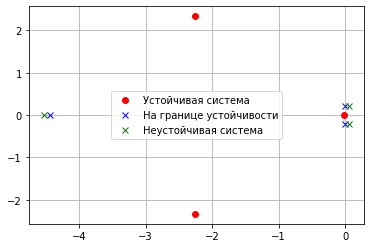

In [55]:
# Poluses
[pole, zeros]=crt.matlab.pzmap(W, Plot=False, title='Pole Zero Map')
[pole_, zeros_]=crt.matlab.pzmap(W_, Plot=False, title='Pole Zero Map')
[pole_n, zeros_n]=crt.matlab.pzmap(W_n, Plot=False, title='Pole Zero Map')
plt.grid()
plt.plot(pole.real,pole.imag,"ro",label="Устойчивая система")
plt.plot(pole_.real,pole_.imag,"bx",label="На границе устойчивости")
plt.plot(pole_n.real,pole_n.imag,"gx",label="Неустойчивая система")
plt.legend(loc='center')

In [57]:
# check stable

for i in pole:
    print("Pole: ",i)
    if i.real>1e-6:
        print('nInitial system is unstable')
        k=0
    else:
        k=1
        print("real(pole) <0\n")
if k==1:
    print('\nInitial system is stable!')


Pole:  (-2.259534289754846+2.336440113916647j)
real(pole) <0

Pole:  (-2.259534289754846-2.336440113916647j)
real(pole) <0

Pole:  (-0.018931420490307355+0j)
real(pole) <0


Initial system is stable!


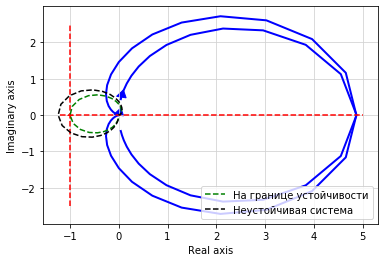

In [64]:
# create Open system
W_op=crt.matlab.series(W234,W1)

# open control system and evaluate stability by the Nyquist criterion
real_, imag_, freq_=crt.matlab.nyquist(W_op, omega=None, Plot=True, linewidth=2, color='b', labelFreq=0)
plt.plot([-1,-1],[-2.5, 2.5],"r--")
plt.plot([-1.2,5],[0, 0],"r--")


W_op_=crt.matlab.series(W234,W1_)
W_op_n=crt.matlab.series(W234,W1_n)
# open control system and evaluate stability by the Nyquist criterion
real_, imag_, freq_=crt.matlab.nyquist(W_op_, omega=None, Plot=False, linewidth=2, color='b', labelFreq=0)
plt.plot(real_,imag_,"g--",label="На границе устойчивости")
#print('\nThe system is stable!(by the Nyquist criterion)')

real_n, imag_n, freq_n=crt.matlab.nyquist(W_op_n, omega=None, Plot=False, linewidth=2, color='b', labelFreq=0)
plt.plot(real_n,imag_n,"k--",label="Неустойчивая система")
plt.legend(loc="lower right")


Initial system is stable!(by the Mikhailov criterion)


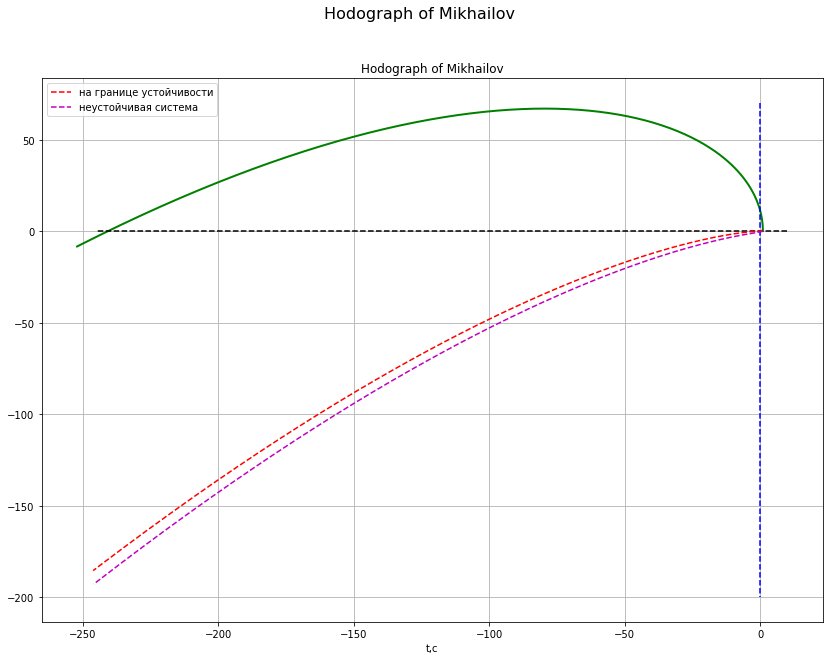

In [66]:
# Mikhailov criterion
den=W.den

func_re,func_im=Mikhailov(den)
plot_func(func_re,func_im, 'Hodograph of Mikhailov')
plt.plot([10,-245],[0,0],"k--")
plt.plot([0,0],[70,-200],"b--")


den_=W_.den
func_re_,func_im_=Mikhailov(den_)
plt.plot(func_re_,func_im_,"r--",label="на границе устойчивости")

den_n=W_n.den
func_re_n,func_im_n=Mikhailov(den_n)
plt.plot(func_re_n,func_im_n,"m--",label="неустойчивая система")
plt.legend()

print('\nInitial system is stable!(by the Mikhailov criterion)')

Text(0.5, 0.98, 'Устойчивая система')

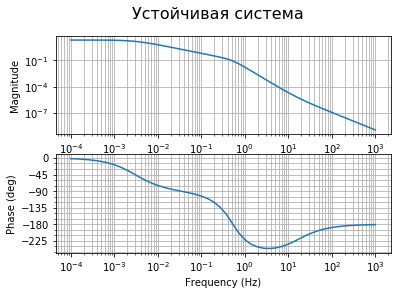

In [73]:
# Frecuency characterisrics
fig=plt.figure()
mag, phase, omega = crt.matlab.bode(W, dB=False)
fig.suptitle("Устойчивая система", fontsize=16)

Text(0.5, 0.98, 'Система на границе устойчивости')

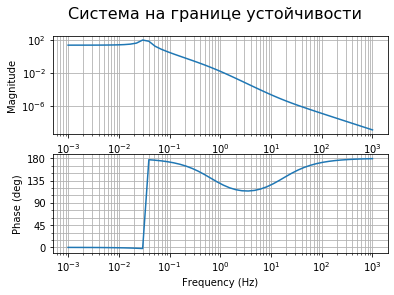

In [74]:
fig=plt.figure()
mag_, phase_, omega_ = crt.matlab.bode(W_, dB=False)
fig.suptitle("Система на границе устойчивости", fontsize=16)

Text(0.5, 0.98, 'Неустойчивая система')

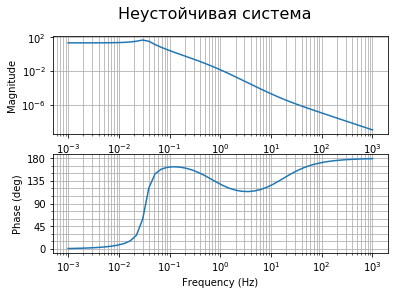

In [76]:
fig=plt.figure()
mag_n, phase_n, omega_n = crt.matlab.bode(W_n, dB=False)
fig.suptitle("Неустойчивая система", fontsize=16)